## Problem Statement

I decide to treat this as a classfication problemby creating a new binaryvariable affair (did the woman have atleast one affair ?) and trying to predict the classification for each woman

In [70]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import seaborn as sns
%matplotlib inline 
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [71]:
# Reading the dataset
data = sm.datasets.fair.load_pandas().data
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [72]:
# List of columns
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [73]:
# Shape of datset
data.shape

(6366, 9)

In [74]:
# checking the describe function for numerical columns
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [75]:
# Checkign the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [76]:
# Checking null values
data.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [77]:
# 1. From above we can conclude that there are no null values in the dataset
# 2. All columns are float type

Text(0,0.5,'Freq')

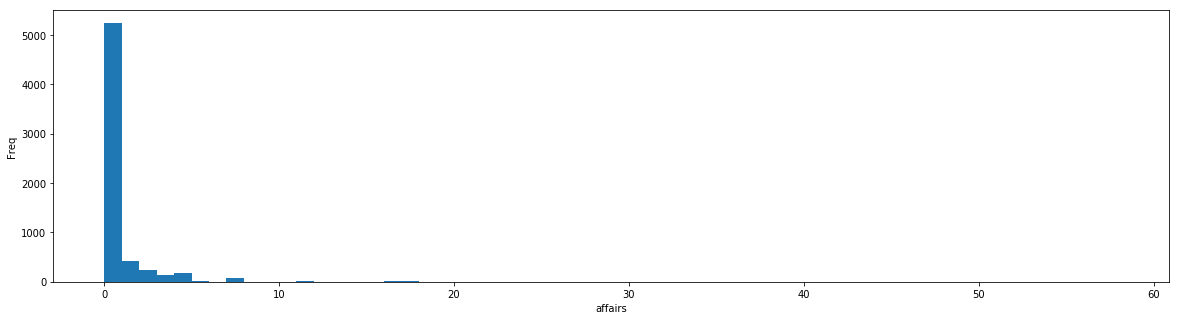

In [78]:
# Plot the affairs column of dataset
maxval=int(data.affairs.max()+1)
minval=int(data.affairs.min())
plt.figure(figsize=(20,5))
plt.hist(data.affairs,bins=maxval,range=(minval,maxval))
plt.xlabel('affairs')
plt.ylabel('Freq')

Text(0,0.5,'Freq')

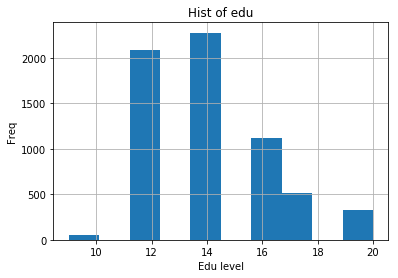

In [79]:
#plotting the edu column hist
import matplotlib.pyplot as plt
data.educ.hist()
plt.title('Hist of edu')
plt.xlabel('Edu level')
plt.ylabel('Freq')

Text(0,0.5,'Freq')

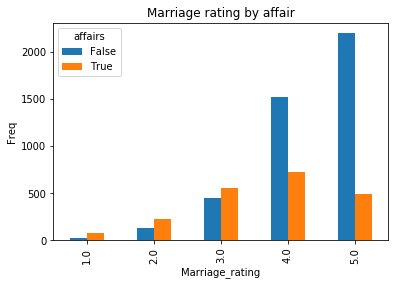

In [80]:
#barplot of marriage rating grouped by affair
pd.crosstab(data.rate_marriage, data.affairs.astype(bool)).plot(kind = 'bar')
plt.title('Marriage rating by affair')
plt.xlabel('Marriage_rating')
plt.ylabel('Freq')

Text(0,0.5,'Freq')

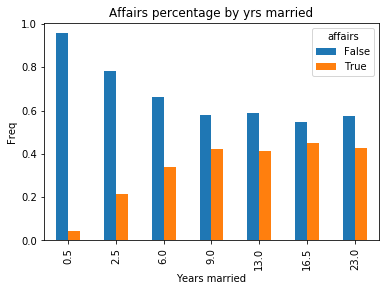

In [81]:
affair_yrs_married = pd.crosstab(data.yrs_married, data.affairs.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float),axis = 0).plot(kind = 'bar') 
plt.title('Affairs percentage by yrs married')
plt.xlabel('Years married')
plt.ylabel('Freq')

In [82]:
data['affairs']=(data.affairs>0).astype(int)

In [83]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


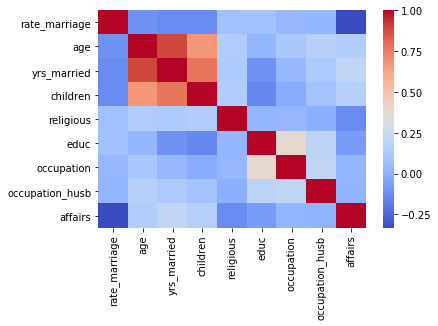

In [84]:
## Correlation plot:

sns.heatmap(data.corr(),cmap='coolwarm')

In [85]:
#create intercept column and dummy var
y, X = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', data, return_type = 'dataframe')
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [86]:
#fixing column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husband)[T.2.0]':'occ_husb_2',
                        'C(occupation_husband)[T.3.0]':'occ_husb_3',
                        'C(occupation_husband)[T.4.0]':'occ_husb_4',
                        'C(occupation_husband)[T.5.0]':'occ_husb_5',
                        'C(occupation_husband)[T.6.0]':'occ_husb_6'})

In [98]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [87]:
#flatten y into a 1-D array
y = np.ravel(y)

In [88]:
#initiate a model, fix X and y
model = LogisticRegression()
model = model.fit(X,y)

#check accuracy on the training set
model.score(X,y)

0.7258875274897895

In [89]:
# splitting data into train and test dataset
X_train,X_test, y_train,y_test = train_test_split(X,y)

In [90]:
# Fitting the model
logReg= LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
# Predicting the output of test dataset
pred=logReg.predict(X_test)
pred

array([0., 0., 1., ..., 0., 0., 1.])

In [92]:
# accuracy score
metrics.accuracy_score(y_test,pred)

0.7116834170854272

In [93]:
# Plotting the ROC curve

In [94]:
# fpr=false positve rate, tpr=true positive rate
fpr, tpr,_=roc_curve(logReg.predict(X_test),y_test,drop_intermediate=False)

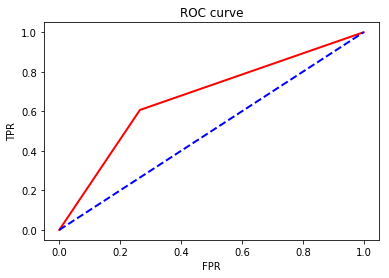

In [95]:
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [96]:
#Predicting the prob of an affair
#19 year old graduate, 3 years of marriage, not religious, rates her marriage as fair, husband is a farmer

In [99]:
model.predict_proba(np.array([[1,0,0,1,0,0,1,0,0,0,0,3,19,3,0,1,14]]))

array([[0.44922993, 0.55077007]])